In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from random import sample

# Erds-Renyi

In [2]:
#Erds-Renyi model

N = 1000
p = 0.01
E = N*(N-1)/2 #number of possible links
nE = int(p*E) #actual number of links in the network

G = nx.Graph()
lNodes = range(N)

for i in range(nE):
    a,b = sample(lNodes,2)
    while G.has_edge(a,b):
        a,b = sample(lNodes,2)
    G.add_edge(a,b)


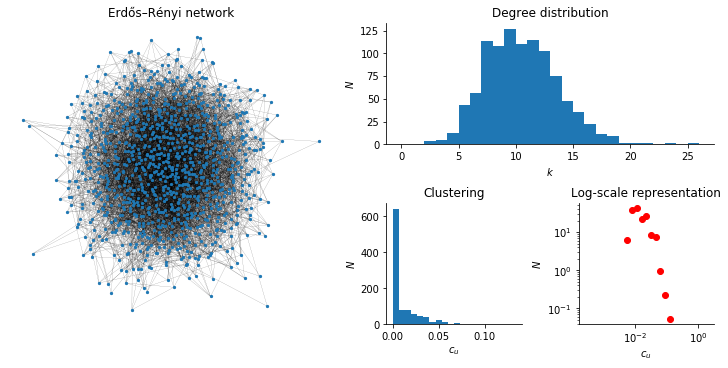

In [4]:
fig3 = plt.figure(constrained_layout=True,figsize=(10,5))
gs = fig3.add_gridspec(2, 4)

f3_ax1 = fig3.add_subplot(gs[:2, :2])
nx.draw_spring(G,node_size=5,width=0.1)
f3_ax1.set_title('Erdős–Rényi network')

f3_ax2 = fig3.add_subplot(gs[0, 2:])
lK = list(dict(G.degree()).values())
plt.hist(lK,bins=range(int(0),int(max(lK)+2)))
f3_ax2.spines['right'].set_visible(False)
f3_ax2.spines['top'].set_visible(False)
plt.xlabel(r'$k$')
plt.ylabel(r'$N$')
f3_ax2.set_title('Degree distribution')

f3_ax3 = fig3.add_subplot(gs[1, 2])
f3_ax3.spines['right'].set_visible(False)
f3_ax3.spines['top'].set_visible(False)
f3_ax3.set_title('Clustering')
dC = nx.clustering(G)
lC = list(dC.values())
plt.hist(lC,bins=20)
plt.xlabel(r'$c_u$')
plt.ylabel(r'$N$')

f3_ax4 = fig3.add_subplot(gs[1, 3])
f3_ax4.spines['right'].set_visible(False)
f3_ax4.spines['top'].set_visible(False)
f3_ax4.set_title('Log-scale representation')
x = 2.**np.arange(-12,2,0.5)
h = np.histogram(lC,bins=x,density=True)
plt.loglog(x[:-1],h[0],"ro")
plt.xlabel(r'$c_u$')
plt.ylabel(r'$N$')

plt.savefig("/home/remy13127/Documents/ghpages/content/images/erds_renyi.png")
plt.show()


# Barabasi-Albert

In [17]:
#barabasi-albert

N=1000
m=2

G = nx.Graph()
G.add_edge(0,1)

for n in range(2,N):
    dK = dict(G.degree())
    lN = G.nodes()
    lK = np.array([dK[p] for p in lN])
    lK = lK/sum(lK)
    lN = list(dK.keys())
    a,b = np.random.choice(lN,size=2,p=lK)
    G.add_edge(n,a)
    G.add_edge(n,b)


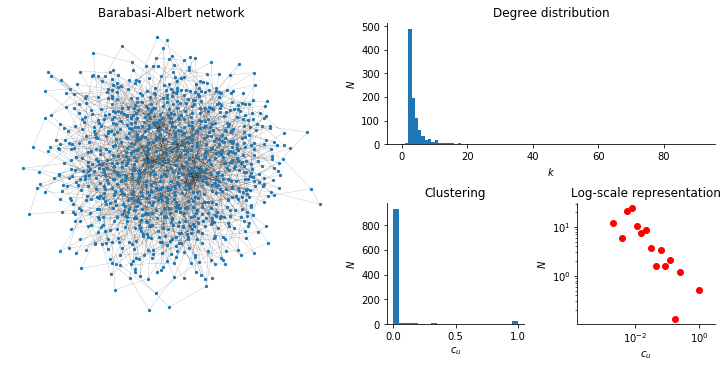

In [18]:
fig3 = plt.figure(constrained_layout=True,figsize=(10,5))
gs = fig3.add_gridspec(2, 4)

f3_ax1 = fig3.add_subplot(gs[:2, :2])
nx.draw_spring(G,node_size=5,width=0.1)
f3_ax1.set_title('Barabasi-Albert network')

f3_ax2 = fig3.add_subplot(gs[0, 2:])
lK = list(dict(G.degree()).values())
plt.hist(lK,bins=range(int(0),int(max(lK)+2)))
f3_ax2.spines['right'].set_visible(False)
f3_ax2.spines['top'].set_visible(False)
plt.xlabel(r'$k$')
plt.ylabel(r'$N$')
f3_ax2.set_title('Degree distribution')

f3_ax3 = fig3.add_subplot(gs[1, 2])
f3_ax3.spines['right'].set_visible(False)
f3_ax3.spines['top'].set_visible(False)
f3_ax3.set_title('Clustering')
dC = nx.clustering(G)
lC = list(dC.values())
plt.hist(lC,bins=20)
plt.xlabel(r'$c_u$')
plt.ylabel(r'$N$')

f3_ax4 = fig3.add_subplot(gs[1, 3])
f3_ax4.spines['right'].set_visible(False)
f3_ax4.spines['top'].set_visible(False)
f3_ax4.set_title('Log-scale representation')
x = 2.**np.arange(-12,2,0.5)
h = np.histogram(lC,bins=x,density=True)
plt.loglog(x[:-1],h[0],"ro")
plt.xlabel(r'$c_u$')
plt.ylabel(r'$N$')

plt.savefig("/home/remy13127/Documents/ghpages/content/images/barabasi_albert.png")
plt.show()